<a href="https://colab.research.google.com/github/F1ameX/Modern-Methods-of-Deep-Machine-Learning/blob/main/1_polynominal_regression/1_polynominal_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import math
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [83]:
N = 1000 # size of sample
sample = np.empty((N, 2), dtype = float)
epsilons = [0.001, 0.1, 1, 1.5] # epsilon variability
rng = np.random.default_rng() # random generator
a, b, c, d = rng.uniform(low = -3.0, high = 3.0, size = 4) # random coefficient

In [84]:
def f(x : float, option : int = 1):
  global a, b, c, d

  if option == 0:
    return a * np.pow(x, 3) + b * np.pow(x, 2) + c * x + d

  elif option == 1:
    return x * np.sin(2 * np.pi * x)

In [104]:
def draw_graph(title : str, X : np.array, y_original : np.array, y_noised : np.array) -> None:
    plt.figure(figsize = (9, 4.5))
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(-1, 1)
    plt.ylim(-3, 3)
    plt.scatter(X, y_noised, c = 'red', linewidths = 0.25, alpha = 0.75)
    plt.scatter(X, y_original, c = 'blue', linewidths = 0.25)
    plt.grid(True)
    plt.show()

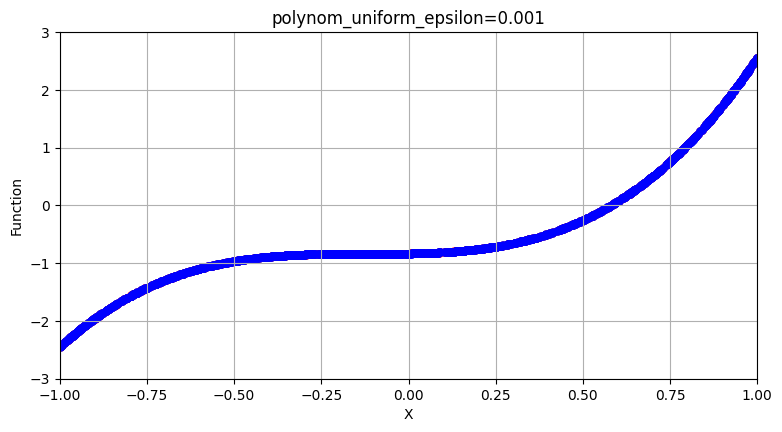

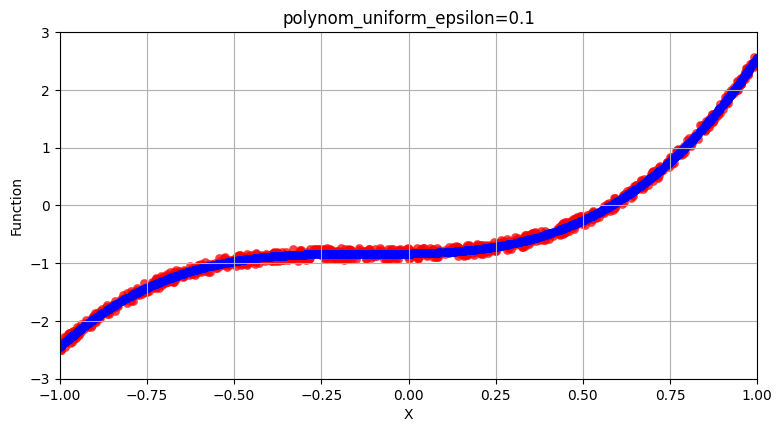

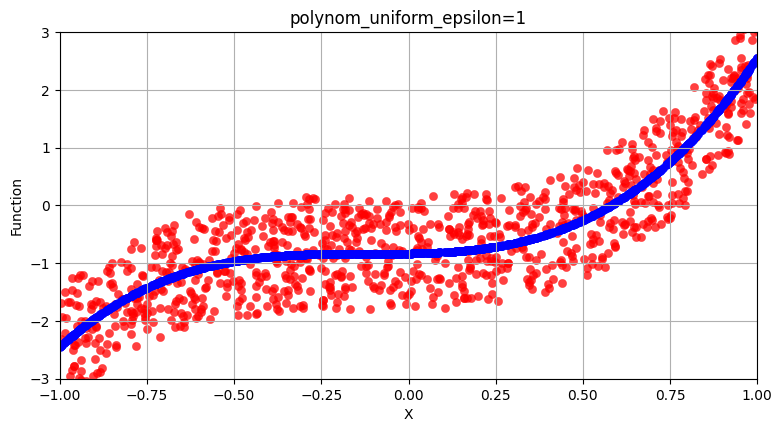

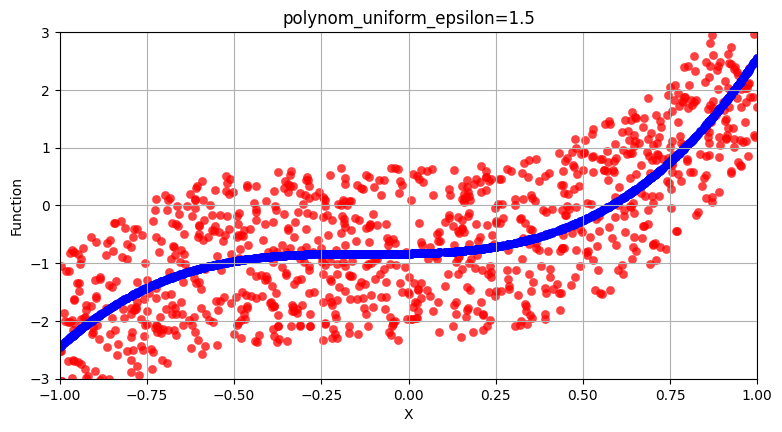

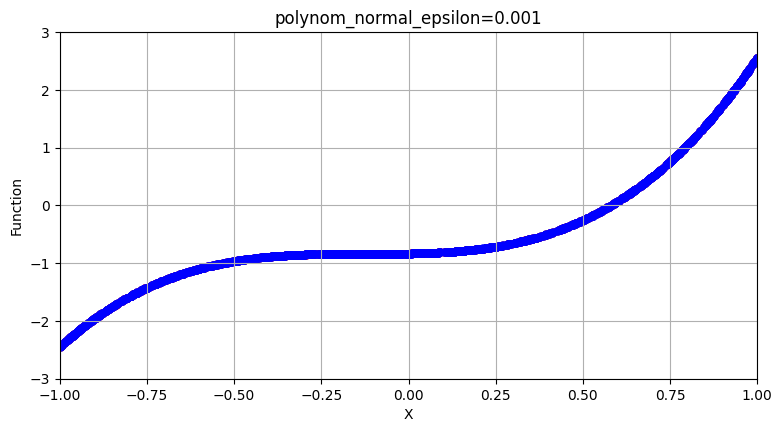

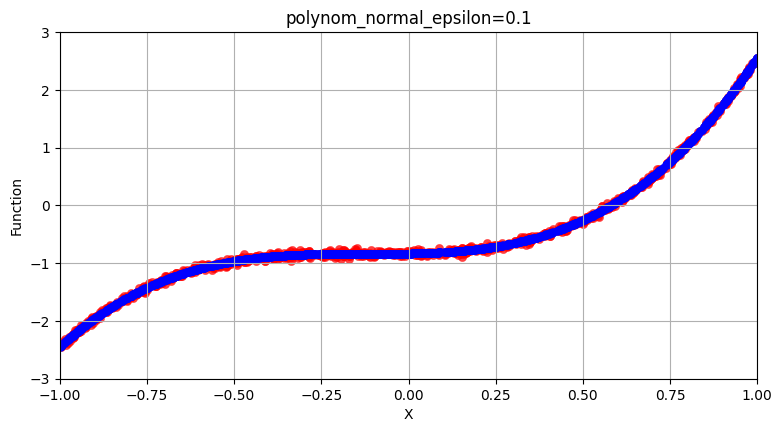

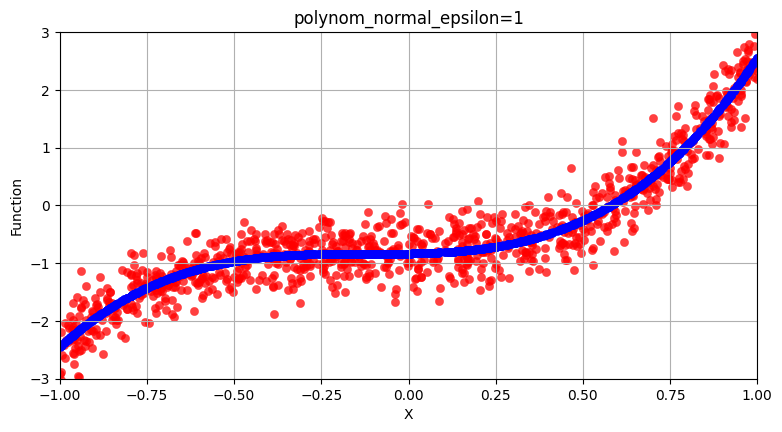

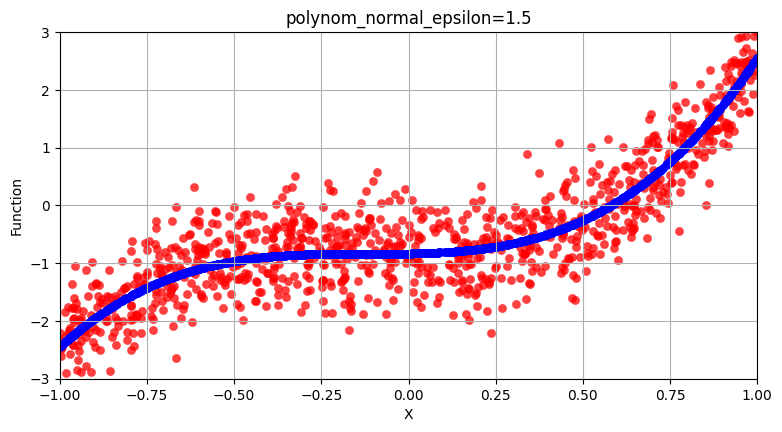

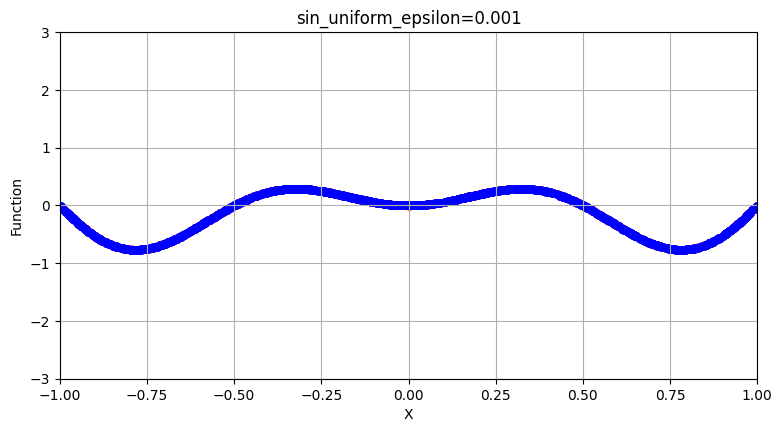

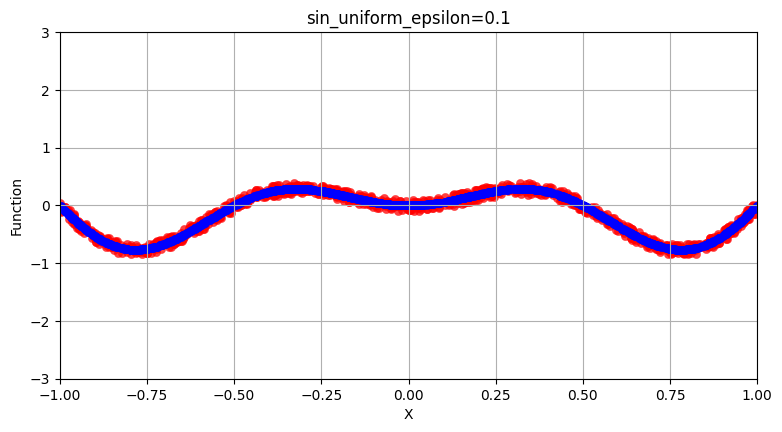

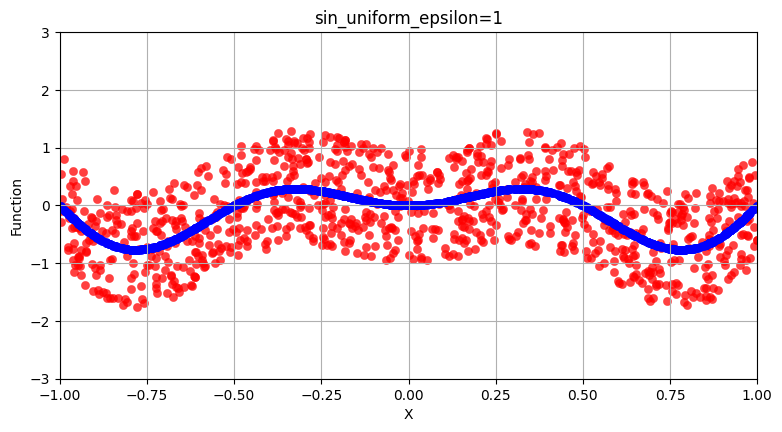

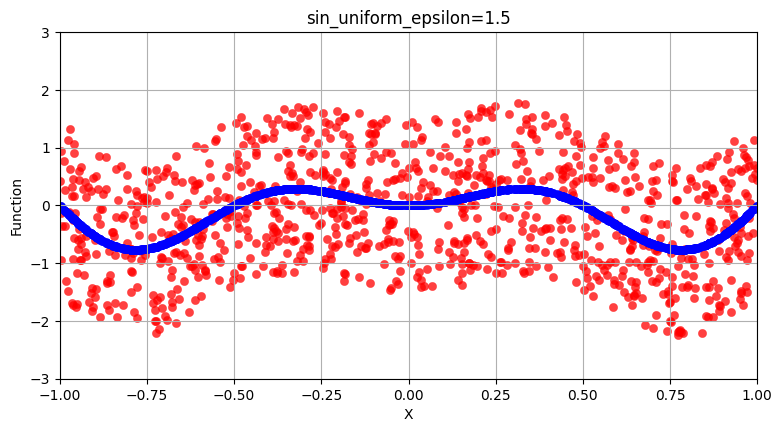

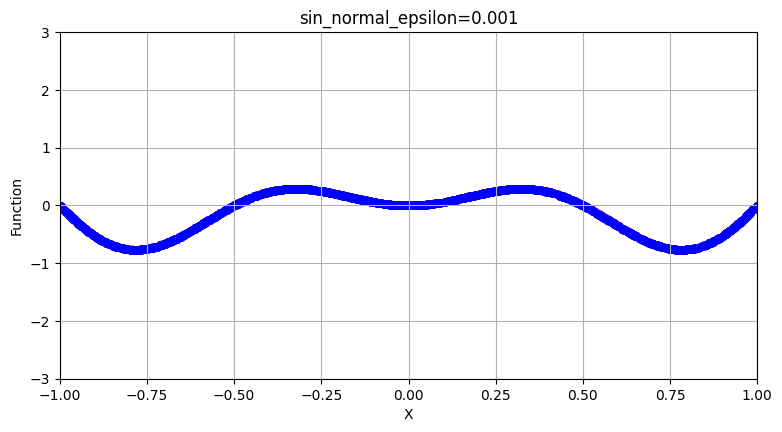

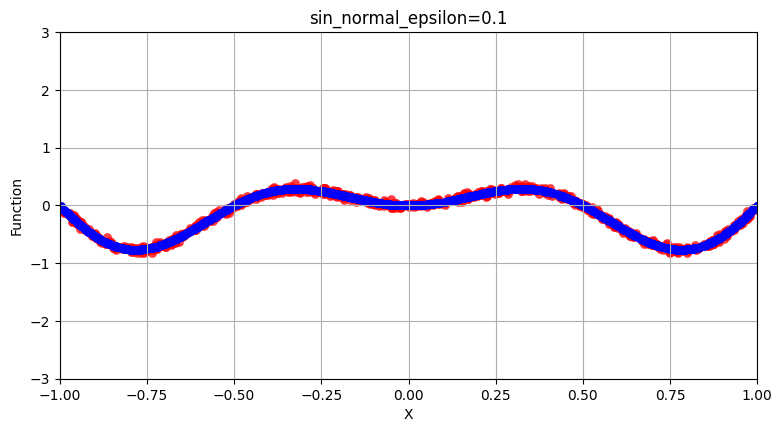

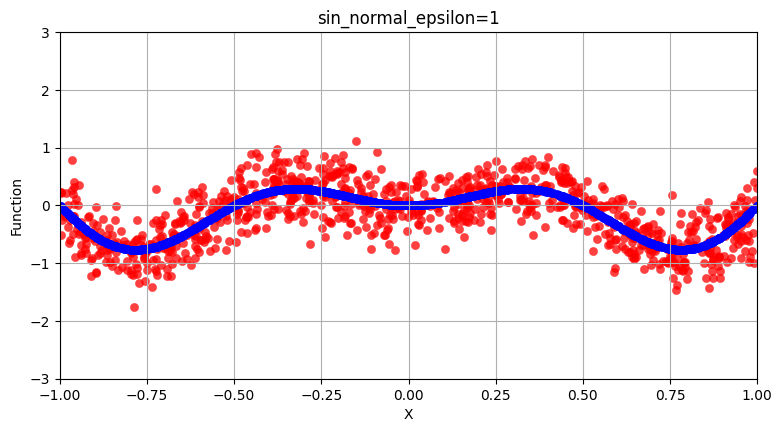

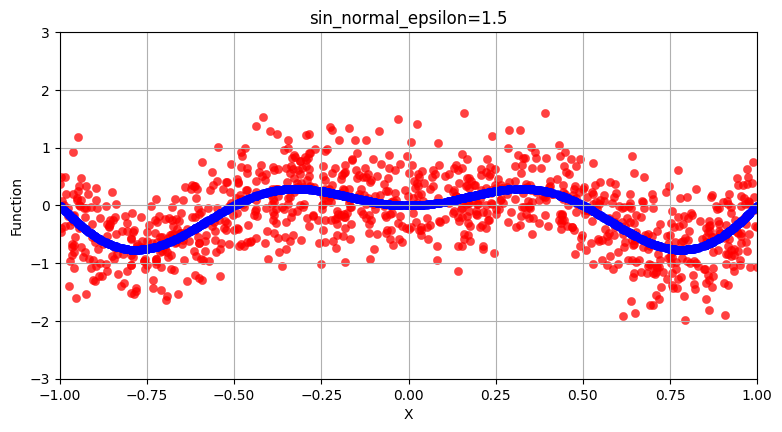

In [106]:
for i in range(N):
    sample[i][0] = rng.uniform(low = -1.0, high = 1.0)

for func in range(2):
    clear = f(sample[:, 0], option = func)
    for distribution in range(2):
        for eps in epsilons:
            for i in range(N):

                if distribution == 0:
                    sample[i][1] = f(sample[i][0], option = func) + rng.uniform(low = -eps, high = eps)
                else:
                    sample[i][1] = f(sample[i][0], option = func) + np.clip(rng.normal(loc = 0.0, scale = eps / 3), -eps, eps)

            if func == 0:
                title = 'polynom'
            if func == 1:
                title = 'sin'

            if distribution == 0:
                title += '_uniform'
            if distribution == 1:
                title += '_normal'

            title += f"_epsilon={eps}"
            draw_graph(title, sample[:, 0], clear, sample[:, 1])